In [1]:
include("../EuclidElements.jl");

# Book 1

## Proposition 1

On a given finite straight line, to construct an equilateral triangle...



### I.1 Easy unit

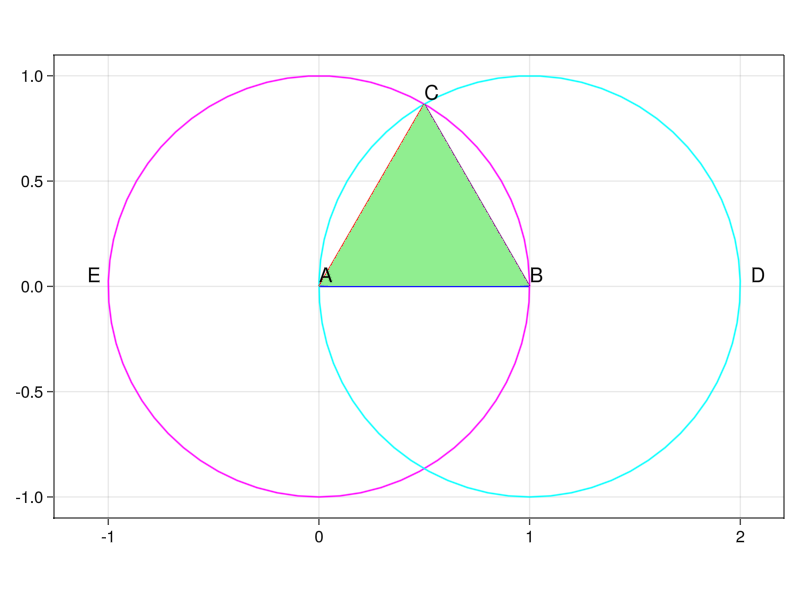

In [2]:
#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect())

#Define & draw points A and B to bound line AB
A = Point2f(0,0)
B = Point2f(1,0)

#Draw a horizontal unit line, AB to get started on
AB = lines!([A, B], color=:blue)

#Draw circle BCD with center at A and radius of length AB
BCD = lines!(Circle(A, norm(A-B)), color=:magenta)
#also draw point D

#Draw circle ACE with center at B and radius of length AB
ACE = lines!(Circle(B, norm(A-B)), color=:cyan)
#also draw point E

# Get C
# this is unit circle 60° because equilateral triangles have 3 60° angles
#   Euclid eye-balled this, but that's okay, the math checks
C = Point2f(1/2, (√3)/2)

#Draw AC and BC to make the equilateral triangle!
AC = lines!([A, C], color=:red)
BC = lines!([B, C], color=:purple)

#And fill the triange to highlight it! :D
poly!([A, C, B], color=:lightgreen)

#Draw the points so everything is well defined
Apoint = text!(A, text="A")
Bpoint = text!(B, text="B")
Cpoint = text!(C, text="C")
Dpoint = text!(2.05, 0, text="D")
Epoint = text!(-1.1, 0, text="E")

#Draw and show the chart :)
current_figure()

### I.1 Rotated and difficult

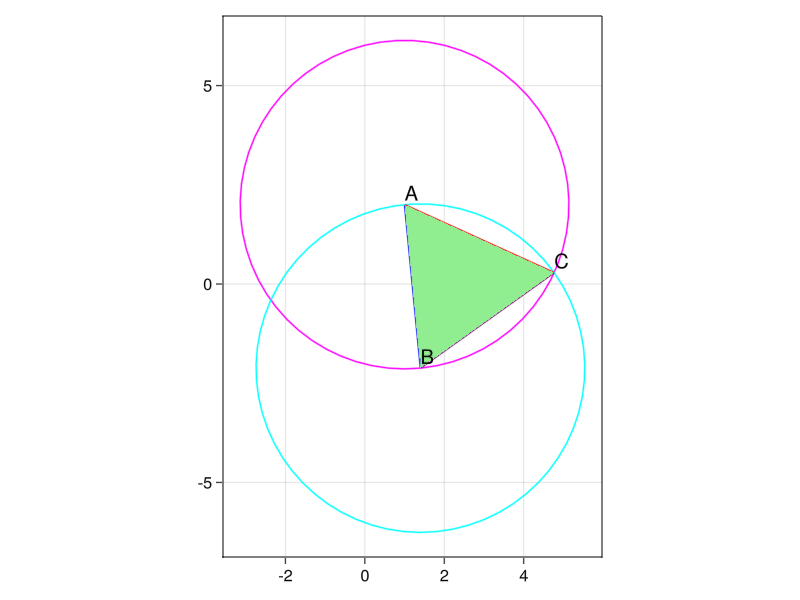

In [3]:
#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect())

#Define points A and B to bound line AB
#A = Point2f(-1,-2)
#B = Point2f(1,2)
A = Point2f(1,2)
B = Point2f(1.4, -2.12)

#Draw line AB to get started on
AB = lines!([A, B], color=:blue)

# Get the radius r, which is the distance of AB
r = norm(B-A)

#Draw circle BCD with center at A and radius of length AB
BCD = lines!(Circle(A, r), color=:magenta)

#Draw circle ACE with center at B and radius of length AB
ACE = lines!(Circle(B, r), color=:cyan)

# this is unit circle 60° * r because equilateral triangles have 3 60° angles
#   just apply a matrix rotation on that [x,y]*r  w/ [x,y] from the unit circle 60°
v = B-A
θ = (π/3) + sign(v[2])*(acos((v[1])/r))
C_x, C_y = [r*cos(θ), r*sin(θ)]+A#[cos(θ) -sin(θ); sin(θ) cos(θ)]*v + A
C = Point2f(C_x, C_y)

#Draw AC and BC to make the equilateral triangle!
AC = lines!([A, C], color=:red)
BC = lines!([B, C], color=:purple)

#And fill the triange to highlight it! :D
poly!([A, C, B], color=:lightgreen)

#Draw the points so everything is well defined
Apoint = text!(A, text="A")
Bpoint = text!(B, text="B")
Cpoint = text!(C, text="C")

#Draw and show the chart :)
current_figure()

### ANIMATION

In [4]:
#Define points A and B to bound line AB
A_0 = Point2f(0.0f0,0.0f0)
B_0 = Point2f(1.4f0, -2.12f0)
A = Observable(A_0)
B = Observable(B_0)

#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect(), title="Euclid's Elements Book I, Proposition 1")
xlims!(ax, -7,8)
ylims!(ax, -7,7)

# Draw the line AB on which to start
AB = @lift(straight_line($A, $B, color=:blue, linewidth=1.0f0))
fill_line(AB[])

# Draw the equilateral triangle
triangle = equilateral_triangle(A[], B[], color=:pink, linewidth=5f0)
C = Point(triangle)

# Now the equilateral triangle is known, so draw it!
triangleAlpha = Observable(0f0)
trianglePoly = poly!(@lift([$A, C, $B]), color=@lift(RGBA(0.0, 0.8, 0.0, $triangleAlpha)))

# Draw some labels for A B and C points
Apoint = text!(A, text="A")
Bpoint = text!(B, text="B")
Cpoint = text!(C, text="C", color=@lift(RGBA(0.0, 0.8, 0.0, $triangleAlpha)))

# Draw the animation!
framerate = 24
d_s = 24
timestamps = range(0,4π, step=4π/(d_s*framerate))

record(f, "Euclid-I-1.gif", timestamps; framerate=framerate) do t
    animate_equilateral(triangle, 0.5π, 2.5π, t, fade_start=3π, fade_end=3.5π)

    # Animate the filled equilateral triangle appearing
    if t > 2.5π && t <= 3.5π
        showTri = t - 2.5π
        triangleAlpha[] = showTri
    end
end;

![animation](Euclid-I-1.gif)